# Using Natural Language Processing (NLP) methods for other Marketing Tasks

University of Florida, Warrington College of Business

In this code example, you will use the same set of comments from an article in the New York Times about a business. Use the NLP "Bag of Words" approach to build a WordCloud and also discover the topics that commenters are discussing. The code requires a pipeline approach to breaking down the comments so that they can be analyzed. Follow the individual steps using the Natural Language Processing Toolkit (NLTK) to perform the analysis. 

Good coding hygiene - Import packages

In [1]:
# import packages
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotnine as plot9
import random
import io
import graphviz
import nltk
# nltk.download () # https://www.nltk.org/data.html
# also see https://www.guru99.comd/download-install-nltk.html
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
# import spacy # conda install -c conda-forge spacy

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaylaburge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kaylaburge/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kaylaburge/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaylaburge/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Import algorithms or functions

In [2]:
# import algorithms or functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from plotnine import *
from sklearn import tree
from dtreeviz.trees import *
# conda install -c conda-forge dtreeviz
# https://anaconda.org/conda-forge/dtreeviz
# vaderSentiment install 

# conda install -c conda-forge vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#from sklearn.datasets import make_classification
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
nltk.data.path.append('/nltk_data')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist # for a frequency distribution of times each word occurs
from tabulate import tabulate # pip install tabulate

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS # conda install -c conda-forge wordcloud

# Deeper NLP tasks

The next section of code will break the comments down in a traditional NLP approach. This approach includes tokenizing each comments and using the tokenized comments to perform NLP tasks like topic analysis.

In [3]:
# https://overfitter.github.io/2020-08-29-Topic-Modelling-Pipeline/
# https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

In [4]:
df = pd.read_excel('/Users/kaylaburge/Downloads/comments_export2-goya-foods-trumpGroup1.xlsx')
df

,Group,commentID,status,commentSequence,userID,userDisplayName,userLocation,userTitle,userURL,picURL,...,replyCount,editorsSelection,parentID,parentUserDisplayName,depth,commentType,trusted,recommendedFlag,permID,isAnonymous
0,0,108090643,approved,108090643,84884248,Tregar,"Pacifica, ca",NaN,NaN,NaN,...,0,False,NaN,NaN,1,comment,False,0,108090643,False
1,0,108091513,approved,108091513,85661524,Mua,Transoceanic,NaN,NaN,NaN,...,0,False,NaN,NaN,1,comment,False,0,108091513,False
2,0,108092770,approved,108092770,109564112,judy🖤,Brooklyn,NaN,NaN,NaN,...,0,False,NaN,NaN,1,comment,False,0,108092770,False
3,0,108092054,approved,108092054,59802894,David,"San Francisco, CA",NaN,NaN,NaN,...,0,False,NaN,NaN,1,comment,False,0,108092054,False
4,0,108092305,approved,108092305,138114422,TX7,TX,NaN,NaN,NaN,...,0,False,NaN,NaN,1,comment,False,0,108092305,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,108085699,approved,108085699,52147740,george eliot,"annapolis, md",NaN,NaN,NaN,...,0,False,108078253.0,Witness,2,userReply,False,0,108085699,False
212,0,108091525,approved,108091525,85661524,Mua,Transoceanic,NaN,NaN,NaN,...,0,False,108078253.0,Witness,2,userReply,False,0,108091525,False
213,0,108084047,approved,108084047,28495436,FRITZ,CT,NaN,NaN,NaN,...,0,False,108077553.0,Tuvw Xyz,2,userReply,False,0,108084047,False
214,0,108086114,approved,108086114,80656926,Barbara,"Victoria, BC",NaN,NaN,NaN,...,0,False,108084047.0,Tuvw Xyz,2,userReply,False,0,108086114,False


In [5]:
comments_df = df[['userID','commentID','userDisplayName','commentBody', 'commentType', 'createDate', 
                  'recommendations', 'replyCount']].copy()

comments_df

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount
0,84884248,108090643,Tregar,"Labels are tricky, but Spanish people are Euro...",comment,2020-07-11 21:19:11,23,0
1,85661524,108091513,Mua,No one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0
2,109564112,108092770,judy🖤,I love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0
3,59802894,108092054,David,"It’s about time. \n\nLook, almost to a person,...",comment,2020-07-12 01:18:59,82,0
4,138114422,108092305,TX7,Remember how the Chick-fil-A boycott worked ou...,comment,2020-07-12 02:39:19,26,0
...,...,...,...,...,...,...,...,...
211,52147740,108085699,george eliot,@Witness \nNot at all. You've got to watch the...,userReply,2020-07-11 10:33:02,2,0
212,85661524,108091525,Mua,"@Witness Sorry, their products are cheap and u...",userReply,2020-07-11 23:26:13,1,0
213,28495436,108084047,FRITZ,"@Tuvw Xyz \nNo, no, and no. This is not about ...",userReply,2020-07-11 08:40:12,292,0
214,80656926,108086114,Barbara,@FRITZ Agree wholeheartedly.,userReply,2020-07-11 11:14:59,8,0


In [6]:
# https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/
comments_df['commentBody'] = comments_df['commentBody'].astype(str).str.lower()
comments_df.head(3)

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount
0,84884248,108090643,Tregar,"labels are tricky, but spanish people are euro...",comment,2020-07-11 21:19:11,23,0
1,85661524,108091513,Mua,no one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0
2,109564112,108092770,judy🖤,i love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0


In [7]:
regexp = RegexpTokenizer('\w+')
comments_df['text_token'] = comments_df['commentBody'].apply(regexp.tokenize)
comments_df.head(3)

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount,text_token
0,84884248,108090643,Tregar,"labels are tricky, but spanish people are euro...",comment,2020-07-11 21:19:11,23,0,"[labels, are, tricky, but, spanish, people, ar..."
1,85661524,108091513,Mua,no one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0,"[no, one, in, their, right, mind, who, cares, ..."
2,109564112,108092770,judy🖤,i love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0,"[i, love, the, white, trump, supporters, sayin..."


In [8]:
# stopwords
stopwords_eng = stopwords.words('english')
print(stopwords_eng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# remove stopwords
comments_df['text_token'] = comments_df['text_token'].apply(lambda x: [item for item in x if item not in stopwords_eng])
comments_df.head(3)

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount,text_token
0,84884248,108090643,Tregar,"labels are tricky, but spanish people are euro...",comment,2020-07-11 21:19:11,23,0,"[labels, tricky, spanish, people, european, la..."
1,85661524,108091513,Mua,no one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0,"[one, right, mind, cares, children, education,..."
2,109564112,108092770,judy🖤,i love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0,"[love, white, trump, supporters, saying, buy, ..."


In [10]:
# get rid of two letter words and convert to string
comments_df['text_string'] = comments_df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
comments_df[['commentBody', 'text_token', 'text_string']].head()

,commentBody,text_token,text_string
0,"labels are tricky, but spanish people are euro...","[labels, tricky, spanish, people, european, la...",labels tricky spanish people european latino r...
1,no one in their right mind who cares about chi...,"[one, right, mind, cares, children, education,...",one right mind cares children education health...
2,i love the white trump supporters saying that ...,"[love, white, trump, supporters, saying, buy, ...",love white trump supporters saying buy goya pe...
3,"it’s about time. \n\nlook, almost to a person,...","[time, look, almost, person, team, trump, fans...",time look almost person team trump fans enable...
4,remember how the chick-fil-a boycott worked ou...,"[remember, chick, fil, boycott, worked, ha, we...",remember chick fil boycott worked well actuall...


In [11]:
all_words = ' '.join([word for word in comments_df['text_string']])

In [12]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [13]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'goya': 125, 'trump': 104, 'people': 72, 'products': 59, 'unanue': 46, 'boycott': 39, 'like': 36, 'buy': 33, 'food': 30, 'president': 28, ...})

In [14]:
fdist.most_common(10)

[('goya', 125),
 ('trump', 104),
 ('people', 72),
 ('products', 59),
 ('unanue', 46),
 ('boycott', 39),
 ('like', 36),
 ('buy', 33),
 ('food', 30),
 ('president', 28)]

In [15]:
top_10 = fdist.most_common(10)
fdist = pd.Series(dict(top_10))
fdist

goya         125
trump        104
people        72
products      59
unanue        46
boycott       39
like          36
buy           33
food          30
president     28
dtype: int64

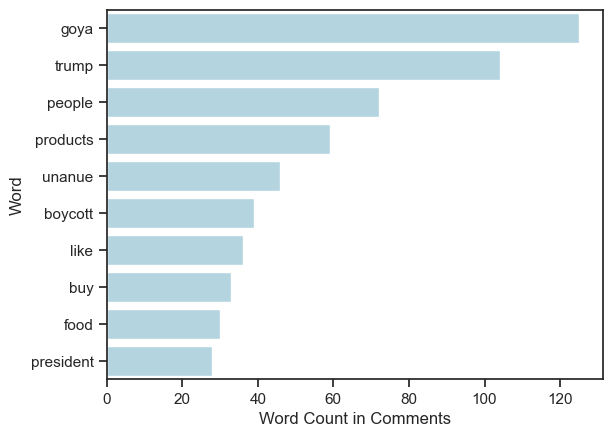

In [16]:
sns.set_theme(style="ticks")
sns.barplot(y = fdist.index, x=fdist.values, color ='lightblue')
plt.xlabel('Word Count in Comments')
plt.ylabel('Word');

In [17]:
comments_df

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount,text_token,text_string
0,84884248,108090643,Tregar,"labels are tricky, but spanish people are euro...",comment,2020-07-11 21:19:11,23,0,"[labels, tricky, spanish, people, european, la...",labels tricky spanish people european latino r...
1,85661524,108091513,Mua,no one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0,"[one, right, mind, cares, children, education,...",one right mind cares children education health...
2,109564112,108092770,judy🖤,i love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0,"[love, white, trump, supporters, saying, buy, ...",love white trump supporters saying buy goya pe...
3,59802894,108092054,David,"it’s about time. \n\nlook, almost to a person,...",comment,2020-07-12 01:18:59,82,0,"[time, look, almost, person, team, trump, fans...",time look almost person team trump fans enable...
4,138114422,108092305,TX7,remember how the chick-fil-a boycott worked ou...,comment,2020-07-12 02:39:19,26,0,"[remember, chick, fil, boycott, worked, ha, we...",remember chick fil boycott worked well actuall...
...,...,...,...,...,...,...,...,...,...,...
211,52147740,108085699,george eliot,@witness \nnot at all. you've got to watch the...,userReply,2020-07-11 10:33:02,2,0,"[witness, got, watch, mixed, metaphors, actual...",witness got watch mixed metaphors actually bus...
212,85661524,108091525,Mua,"@witness sorry, their products are cheap and u...",userReply,2020-07-11 23:26:13,1,0,"[witness, sorry, products, cheap, ubiquitous, ...",witness sorry products cheap ubiquitous claim ...
213,28495436,108084047,FRITZ,"@tuvw xyz \nno, no, and no. this is not about ...",userReply,2020-07-11 08:40:12,292,0,"[tuvw, xyz, cuisine, preferable, tastes, worth...",tuvw xyz cuisine preferable tastes worth defen...
214,80656926,108086114,Barbara,@fritz agree wholeheartedly.,userReply,2020-07-11 11:14:59,8,0,"[fritz, agree, wholeheartedly]",fritz agree wholeheartedly


In [18]:
fdist = FreqDist(tokenized_words)
# filter out infrequently occuring words (less than 3)
comments_df['text_string_fdist'] = comments_df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 3 ]))
comments_df

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount,text_token,text_string,text_string_fdist
0,84884248,108090643,Tregar,"labels are tricky, but spanish people are euro...",comment,2020-07-11 21:19:11,23,0,"[labels, tricky, spanish, people, european, la...",labels tricky spanish people european latino r...,spanish people european latino really sure his...
1,85661524,108091513,Mua,no one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0,"[one, right, mind, cares, children, education,...",one right mind cares children education health...,one right mind children immigration policy lik...
2,109564112,108092770,judy🖤,i love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0,"[love, white, trump, supporters, saying, buy, ...",love white trump supporters saying buy goya pe...,love white trump supporters saying buy goya pe...
3,59802894,108092054,David,"it’s about time. \n\nlook, almost to a person,...",comment,2020-07-12 01:18:59,82,0,"[time, look, almost, person, team, trump, fans...",time look almost person team trump fans enable...,time look person trump end even even yes boyco...
4,138114422,108092305,TX7,remember how the chick-fil-a boycott worked ou...,comment,2020-07-12 02:39:19,26,0,"[remember, chick, fil, boycott, worked, ha, we...",remember chick fil boycott worked well actuall...,remember chick fil boycott well actually boyco...
...,...,...,...,...,...,...,...,...,...,...,...
211,52147740,108085699,george eliot,@witness \nnot at all. you've got to watch the...,userReply,2020-07-11 10:33:02,2,0,"[witness, got, watch, mixed, metaphors, actual...",witness got watch mixed metaphors actually bus...,witness got actually bus
212,85661524,108091525,Mua,"@witness sorry, their products are cheap and u...",userReply,2020-07-11 23:26:13,1,0,"[witness, sorry, products, cheap, ubiquitous, ...",witness sorry products cheap ubiquitous claim ...,witness sorry products claim
213,28495436,108084047,FRITZ,"@tuvw xyz \nno, no, and no. this is not about ...",userReply,2020-07-11 08:40:12,292,0,"[tuvw, xyz, cuisine, preferable, tastes, worth...",tuvw xyz cuisine preferable tastes worth defen...,cuisine worth man customer base made people tr...
214,80656926,108086114,Barbara,@fritz agree wholeheartedly.,userReply,2020-07-11 11:14:59,8,0,"[fritz, agree, wholeheartedly]",fritz agree wholeheartedly,agree


In [19]:
comments_df[['commentBody', 'text_token', 'text_string', 'text_string_fdist']].head()

,commentBody,text_token,text_string,text_string_fdist
0,"labels are tricky, but spanish people are euro...","[labels, tricky, spanish, people, european, la...",labels tricky spanish people european latino r...,spanish people european latino really sure his...
1,no one in their right mind who cares about chi...,"[one, right, mind, cares, children, education,...",one right mind cares children education health...,one right mind children immigration policy lik...
2,i love the white trump supporters saying that ...,"[love, white, trump, supporters, saying, buy, ...",love white trump supporters saying buy goya pe...,love white trump supporters saying buy goya pe...
3,"it’s about time. \n\nlook, almost to a person,...","[time, look, almost, person, team, trump, fans...",time look almost person team trump fans enable...,time look person trump end even even yes boyco...
4,remember how the chick-fil-a boycott worked ou...,"[remember, chick, fil, boycott, worked, ha, we...",remember chick fil boycott worked well actuall...,remember chick fil boycott well actually boyco...


The next step requires the WordNet Lemmatizer. More information about Lemmatization can be found in this [article](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#:~:text=TreeTagger-,2.,and%20most%20commonly%20used%20lemmatizers.) and this [article](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/).

In [20]:
wordnet_lem = WordNetLemmatizer()
comments_df['text_string_lem'] = comments_df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [21]:
comments_df['is_equal']= (comments_df['text_string_fdist']==comments_df['text_string_lem'])
comments_df.is_equal.value_counts()

is_equal
True    216
Name: count, dtype: int64

In [22]:
all_words_lem = ' '.join([word for word in comments_df['text_string_lem']])

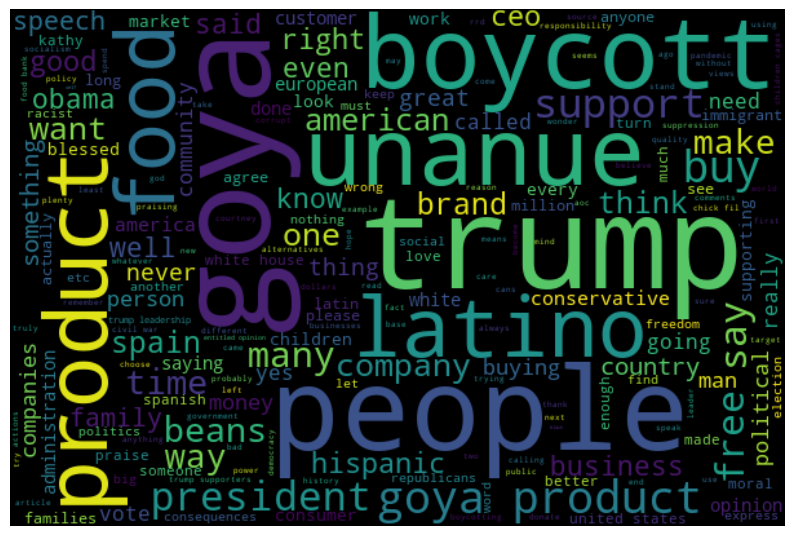

In [23]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

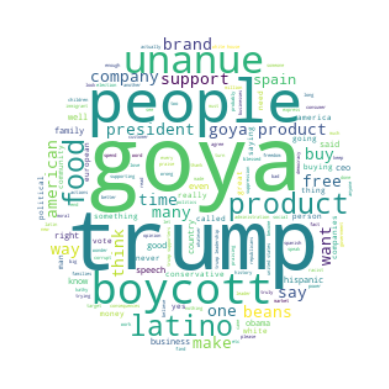

In [24]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

# Topic Analysis

Topic analysis is an unsupervised learning approach to identifying topics within communications. The technique used for the unsupervized learning is latent dirichlet allocation (LDA).

In [25]:
# https://overfitter.github.io/2020-08-29-Topic-Modelling-Pipeline/
comments_df.head(3)

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,84884248,108090643,Tregar,"labels are tricky, but spanish people are euro...",comment,2020-07-11 21:19:11,23,0,"[labels, tricky, spanish, people, european, la...",labels tricky spanish people european latino r...,spanish people european latino really sure his...,spanish people european latino really sure his...,True
1,85661524,108091513,Mua,no one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0,"[one, right, mind, cares, children, education,...",one right mind cares children education health...,one right mind children immigration policy lik...,one right mind children immigration policy lik...,True
2,109564112,108092770,judy🖤,i love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0,"[love, white, trump, supporters, saying, buy, ...",love white trump supporters saying buy goya pe...,love white trump supporters saying buy goya pe...,love white trump supporters saying buy goya pe...,True


In [26]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [27]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [28]:
text = list(comments_df.text_string.values)
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [29]:
lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 365)

In [30]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=365)

In [31]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [32]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.0.


In [33]:
n_top_words = 10
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:people, trump, goya, boycott, free, support, right, product, like, business

Topic #1:goya, latino, trump, food, people, product, family, like, spain, unanue

Topic #2:trump, unanue, obama, say, goya, bean, product, president, said, people

Topic #3:history, hispanic, beria, google, agree, http, wikipedia, born, known, america

Topic #4:goya, product, food, opinion, buy, make, entitled, trump, long, good


In [34]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]
fifth_topic = lda.components_[4]

In [35]:
first_topic.shape

(698,)

### Create Word Cloud visualizations of the topic groups

In [36]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]
fifth_topic_words = [tf_feature_names[i] for i in fifth_topic.argsort()[:-50 - 1 :-1]]

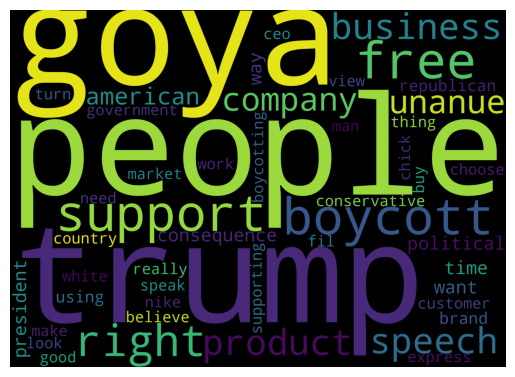

In [37]:
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

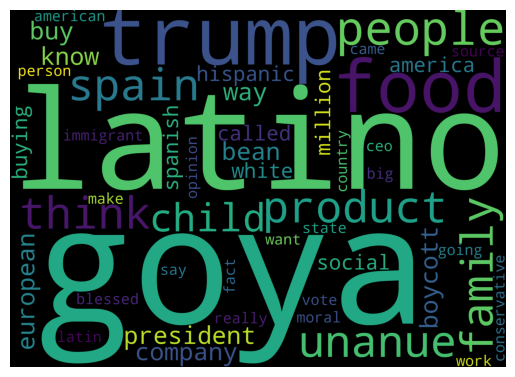

In [38]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

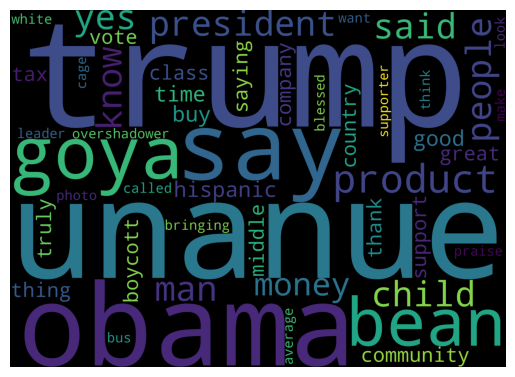

In [39]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

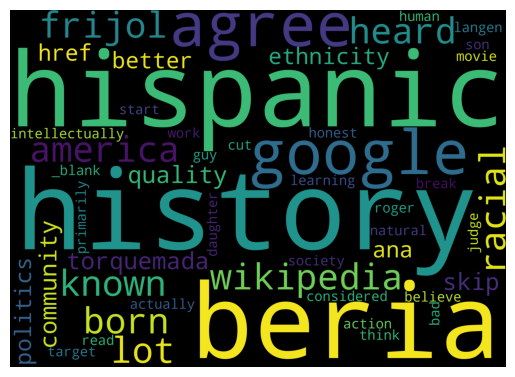

In [40]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fourth_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

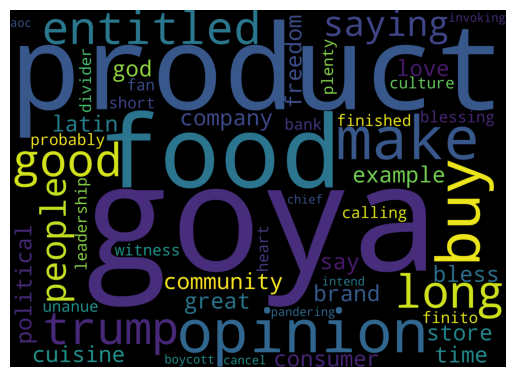

In [41]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(fifth_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [42]:
# https://yanlinc.medium.com/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

In [43]:
# create matrix with probabilities
lda_output = lda.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
docnames = ["Doc"+str(i) for i in range(len(comments_df))]

# make into a data frame
df_document_topic = pd.DataFrame(np.round(lda_output,2),
columns = topicnames, index = docnames)

# get dominatnt topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis = 1)
df_document_topic['dominant_topic'] = dominant_topic

# identify the dominant topic using a color in the data frame
def color_red(val):
    color = 'red' if val >= .5 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
 weight = 700 if val >= .5 else 400
 return 'font-weight: {weight}'.format(weight=weight)
    
# apply style
df_document_topics = df_document_topic.head(15).style.applymap(color_red).applymap(make_bold)
df_document_topics

/var/folders/_f/jxf6gqq91bg2n4kxz46lwv200000gn/T/ipykernel_33096/645017421.py:28: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.


,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.010000,0.950000,0.010000,0.010000,0.010000,1
Doc1,0.010000,0.970000,0.010000,0.010000,0.010000,1
Doc2,0.010000,0.010000,0.950000,0.010000,0.010000,2
Doc3,0.970000,0.010000,0.010000,0.010000,0.010000,0
Doc4,0.930000,0.020000,0.020000,0.020000,0.020000,0
Doc5,0.010000,0.970000,0.010000,0.010000,0.010000,1
Doc6,0.030000,0.030000,0.880000,0.030000,0.030000,2
Doc7,0.010000,0.010000,0.970000,0.010000,0.010000,2
Doc8,0.020000,0.020000,0.740000,0.020000,0.210000,2
Doc9,0.040000,0.040000,0.840000,0.040000,0.040000,2


In [44]:
# topic-keyword matrix
df_topic_keywords = pd.DataFrame(lda.components_)

df_topic_keywords.columns = tf_vectorizer.get_feature_names_out()
df_topic_keywords.index = topicnames

df_topic_keywords.head(5)

,100,1936,2018,_blank,absolutely,abuse,accept,acknowledge,act,action,...,worker,world,worse,worth,wrong,xyz,yard,year,yes,yesterday
Topic0,2.181996,0.656938,0.521081,0.667454,0.958454,1.201800,1.358618,0.609963,1.296953,2.129883,...,0.615168,1.360781,0.676493,1.248133,2.087656,1.177130,0.656503,2.632583,2.532170,0.494190
Topic1,0.769362,2.134790,1.019546,0.606892,1.031210,1.059501,0.654513,1.139603,1.178654,0.554324,...,1.564310,0.748929,1.018548,1.703251,1.704512,1.208252,1.273762,1.564135,0.694948,0.602513
Topic2,1.101496,0.552488,1.727962,1.154684,0.660642,1.057876,0.733965,1.174746,0.678173,1.018399,...,0.603742,2.030725,1.017423,0.578067,0.658726,0.643880,0.611834,0.615839,3.671776,1.432153
Topic3,0.570422,0.687439,0.732918,1.069567,0.725376,0.581210,0.583727,0.664857,0.629243,1.006294,...,0.654364,0.675989,0.669614,0.560901,0.634490,0.621316,0.603830,0.707046,0.561329,0.624710
Topic4,1.246114,0.688425,0.706108,0.524245,0.585003,0.726553,0.660095,0.632714,0.531949,1.190349,...,0.638757,0.704537,0.789581,0.647341,0.682079,0.678835,1.049695,0.972541,1.182070,0.557562


In [45]:
# get the top n keywords for each topic
def show_topics(vectorizer = tf_vectorizer, lda_model = lda,
               n_words=10):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer = tf_vectorizer,
                            lda_model=lda, n_words=10)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,people,trump,goya,boycott,free,support,right,product,like,business
Topic 1,goya,latino,trump,food,people,product,family,like,spain,unanue
Topic 2,trump,unanue,obama,say,goya,bean,product,president,said,people
Topic 3,history,hispanic,beria,google,agree,http,wikipedia,born,known,america
Topic 4,goya,product,food,opinion,buy,make,entitled,trump,long,good


In [46]:
# next infer topics from the top key words
Topics = ["Boycott Goya", "Goya & Latinos", "Trump & Unanue", "History Hispanics", "Buy Goya" ]
df_topic_keywords["Topics"]=Topics
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Topics
Topic 0,people,trump,goya,boycott,free,support,right,product,like,business,Boycott Goya
Topic 1,goya,latino,trump,food,people,product,family,like,spain,unanue,Goya & Latinos
Topic 2,trump,unanue,obama,say,goya,bean,product,president,said,people,Trump & Unanue
Topic 3,history,hispanic,beria,google,agree,http,wikipedia,born,known,america,History Hispanics
Topic 4,goya,product,food,opinion,buy,make,entitled,trump,long,good,Buy Goya


In [47]:
comments_df['topicNumber'] = dominant_topic
comments_df

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount,text_token,text_string,text_string_fdist,text_string_lem,is_equal,topicNumber
0,84884248,108090643,Tregar,"labels are tricky, but spanish people are euro...",comment,2020-07-11 21:19:11,23,0,"[labels, tricky, spanish, people, european, la...",labels tricky spanish people european latino r...,spanish people european latino really sure his...,spanish people european latino really sure his...,True,1
1,85661524,108091513,Mua,no one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0,"[one, right, mind, cares, children, education,...",one right mind cares children education health...,one right mind children immigration policy lik...,one right mind children immigration policy lik...,True,1
2,109564112,108092770,judy🖤,i love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0,"[love, white, trump, supporters, saying, buy, ...",love white trump supporters saying buy goya pe...,love white trump supporters saying buy goya pe...,love white trump supporters saying buy goya pe...,True,2
3,59802894,108092054,David,"it’s about time. \n\nlook, almost to a person,...",comment,2020-07-12 01:18:59,82,0,"[time, look, almost, person, team, trump, fans...",time look almost person team trump fans enable...,time look person trump end even even yes boyco...,time look person trump end even even yes boyco...,True,0
4,138114422,108092305,TX7,remember how the chick-fil-a boycott worked ou...,comment,2020-07-12 02:39:19,26,0,"[remember, chick, fil, boycott, worked, ha, we...",remember chick fil boycott worked well actuall...,remember chick fil boycott well actually boyco...,remember chick fil boycott well actually boyco...,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,52147740,108085699,george eliot,@witness \nnot at all. you've got to watch the...,userReply,2020-07-11 10:33:02,2,0,"[witness, got, watch, mixed, metaphors, actual...",witness got watch mixed metaphors actually bus...,witness got actually bus,witness got actually bus,True,2
212,85661524,108091525,Mua,"@witness sorry, their products are cheap and u...",userReply,2020-07-11 23:26:13,1,0,"[witness, sorry, products, cheap, ubiquitous, ...",witness sorry products cheap ubiquitous claim ...,witness sorry products claim,witness sorry products claim,True,4
213,28495436,108084047,FRITZ,"@tuvw xyz \nno, no, and no. this is not about ...",userReply,2020-07-11 08:40:12,292,0,"[tuvw, xyz, cuisine, preferable, tastes, worth...",tuvw xyz cuisine preferable tastes worth defen...,cuisine worth man customer base made people tr...,cuisine worth man customer base made people tr...,True,0
214,80656926,108086114,Barbara,@fritz agree wholeheartedly.,userReply,2020-07-11 11:14:59,8,0,"[fritz, agree, wholeheartedly]",fritz agree wholeheartedly,agree,agree,True,3


In [48]:
# https://cmdlinetips.com/2018/01/how-to-add-a-new-column-to-using-a-dictionary-in-pandas-data-frame/
topic_dict = {0:"Boycot Goya", 1:"Goya & Latinos", 2:"Trump & Unanue", 3:"History Hispanics", 4:"Buy Goya"}
topic_dict

{0: 'Boycot Goya',
 1: 'Goya & Latinos',
 2: 'Trump & Unanue',
 3: 'History Hispanics',
 4: 'Buy Goya'}

In [49]:
comments_df['topicName'] = comments_df['topicNumber'].map(topic_dict)
comments_df

,userID,commentID,userDisplayName,commentBody,commentType,createDate,recommendations,replyCount,text_token,text_string,text_string_fdist,text_string_lem,is_equal,topicNumber,topicName
0,84884248,108090643,Tregar,"labels are tricky, but spanish people are euro...",comment,2020-07-11 21:19:11,23,0,"[labels, tricky, spanish, people, european, la...",labels tricky spanish people european latino r...,spanish people european latino really sure his...,spanish people european latino really sure his...,True,1,Goya & Latinos
1,85661524,108091513,Mua,no one in their right mind who cares about chi...,comment,2020-07-11 23:24:27,163,0,"[one, right, mind, cares, children, education,...",one right mind cares children education health...,one right mind children immigration policy lik...,one right mind children immigration policy lik...,True,1,Goya & Latinos
2,109564112,108092770,judy🖤,i love the white trump supporters saying that ...,comment,2020-07-12 05:13:26,121,0,"[love, white, trump, supporters, saying, buy, ...",love white trump supporters saying buy goya pe...,love white trump supporters saying buy goya pe...,love white trump supporters saying buy goya pe...,True,2,Trump & Unanue
3,59802894,108092054,David,"it’s about time. \n\nlook, almost to a person,...",comment,2020-07-12 01:18:59,82,0,"[time, look, almost, person, team, trump, fans...",time look almost person team trump fans enable...,time look person trump end even even yes boyco...,time look person trump end even even yes boyco...,True,0,Boycot Goya
4,138114422,108092305,TX7,remember how the chick-fil-a boycott worked ou...,comment,2020-07-12 02:39:19,26,0,"[remember, chick, fil, boycott, worked, ha, we...",remember chick fil boycott worked well actuall...,remember chick fil boycott well actually boyco...,remember chick fil boycott well actually boyco...,True,0,Boycot Goya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,52147740,108085699,george eliot,@witness \nnot at all. you've got to watch the...,userReply,2020-07-11 10:33:02,2,0,"[witness, got, watch, mixed, metaphors, actual...",witness got watch mixed metaphors actually bus...,witness got actually bus,witness got actually bus,True,2,Trump & Unanue
212,85661524,108091525,Mua,"@witness sorry, their products are cheap and u...",userReply,2020-07-11 23:26:13,1,0,"[witness, sorry, products, cheap, ubiquitous, ...",witness sorry products cheap ubiquitous claim ...,witness sorry products claim,witness sorry products claim,True,4,Buy Goya
213,28495436,108084047,FRITZ,"@tuvw xyz \nno, no, and no. this is not about ...",userReply,2020-07-11 08:40:12,292,0,"[tuvw, xyz, cuisine, preferable, tastes, worth...",tuvw xyz cuisine preferable tastes worth defen...,cuisine worth man customer base made people tr...,cuisine worth man customer base made people tr...,True,0,Boycot Goya
214,80656926,108086114,Barbara,@fritz agree wholeheartedly.,userReply,2020-07-11 11:14:59,8,0,"[fritz, agree, wholeheartedly]",fritz agree wholeheartedly,agree,agree,True,3,History Hispanics


In [50]:
# https://cmdlinetips.com/2018/02/how-to-get-frequency-counts-of-a-column-in-pandas-dataframe/
comments_df['topicName'].value_counts()

topicName
Boycot Goya          67
Goya & Latinos       57
Trump & Unanue       50
Buy Goya             32
History Hispanics    10
Name: count, dtype: int64

In [51]:
count_of_topics = pd.DataFrame(comments_df['topicName'].value_counts())
count_of_topics.reset_index(inplace=True)
count_of_topics.rename(columns = {'index':'Topic', 'topicName':'Topic'}, inplace = True)
count_of_topics

,Topic,count
0,Boycot Goya,67
1,Goya & Latinos,57
2,Trump & Unanue,50
3,Buy Goya,32
4,History Hispanics,10


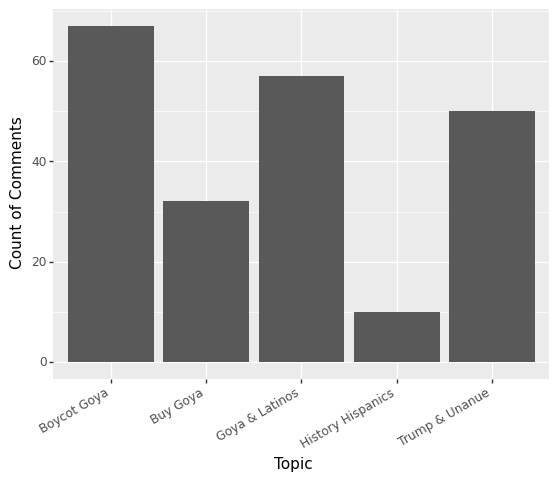

<ggplot: (346947393)>

In [52]:
(
ggplot(count_of_topics, aes('Topic','count'))+
    geom_bar(stat="identity")+
    labs(x= "Topic", y="Count of Comments")+
    theme(axis_text_x  = element_text(angle = 30, hjust = 1))
)

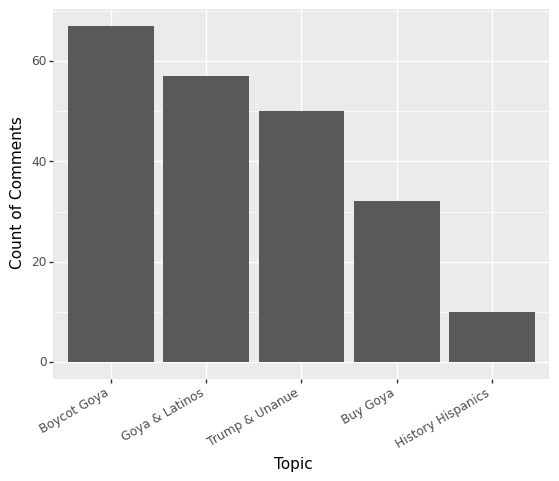

<ggplot: (347028229)>

In [53]:
# https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-order-plot-series.html
topic_list = count_of_topics['Topic'].value_counts().index.tolist()[::1]
(
ggplot(count_of_topics, aes('Topic','count'))+
    geom_bar(stat="identity")+
    scale_x_discrete(limits=topic_list)+
    labs(x = "Topic", y="Count of Comments")+
    theme(axis_text_x  = element_text(angle = 30, hjust = 1))
)